<a href="https://colab.research.google.com/github/hafildabelafadhilah/MachineLearning/blob/main/Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas._libs.algos import diff_2d
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv('housing.csv')

In [ ]:
#Melihat informasi setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
num=['longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income',	'median_house_value']

In [ ]:
#Melihat deskripsi data numerik
df[num].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Melihat deskripsi data kategorik
df['ocean_proximity'].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [ ]:
#Value counting
print(f'value count untuk kolom ocean_proximity')
print(df['ocean_proximity'].value_counts())
print()

value count untuk kolom ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64



In [ ]:
#Melihat data yang hilang alias Missing Value
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df1=df.fillna(df['total_bedrooms'].median())

In [ ]:
#Duplikasi data
df1.duplicated().sum()

0

In [ ]:

#Handling Outlier menggunakan Zscore
print(f'jumlah baris sebelum di filter : {len(df1)}')

filtered_entries=np.array([True]*len(df1))
for col in ['total_rooms',	'total_bedrooms',	'population',	'households',	'median_income', 'median_house_value']:
  zscore = abs(stats.zscore(df1[col]))
  filtered_entries= (zscore < 3) & filtered_entries
df2=df1[filtered_entries]

print(f'jumlah baris setelah di filter: {len(df2)}')

jumlah baris sebelum di filter : 20640
jumlah baris setelah di filter: 19746


In [ ]:
#Handling outlier menggunakan IQR
print(f"jumlah baris sebelum di filter:{len(df1)}")

filtered_entries=np.array([True]*len(df1))
for col in ['total_rooms',	'total_bedrooms',	'population',	'households',	'median_income', 'median_house_value']:
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  low = Q1 - (IQR * 1.5)
  high = Q1 + (IQR * 1.5)

  filtered_entries = ((df1[col] >= low) & (df1[col] <= high)) & filtered_entries
    
df2 = df1[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

jumlah baris sebelum di filter:20640
Jumlah baris setelah memfilter outlier: 13278


In [ ]:

df2['longitude']=StandardScaler().fit_transform(df2['longitude'].values.reshape(len(df2), 1))
df2['latitude']=StandardScaler().fit_transform(df2['latitude'].values.reshape(len(df2), 1))
df2['housing_median_age']=StandardScaler().fit_transform(df2['housing_median_age'].values.reshape(len(df2), 1))
df2['total_rooms']=StandardScaler().fit_transform(df2['total_rooms'].values.reshape(len(df2), 1))
df2['total_bedrooms']=StandardScaler().fit_transform(df2['total_bedrooms'].values.reshape(len(df2), 1))
df2['population']=StandardScaler().fit_transform(df2['population'].values.reshape(len(df2), 1))
df2['households']=StandardScaler().fit_transform(df2['households'].values.reshape(len(df2), 1))
df2['median_income']=StandardScaler().fit_transform(df2['median_income'].values.reshape(len(df2), 1))
df2['median_house_value']=StandardScaler().fit_transform(df2['median_house_value'].values.reshape(len(df2), 1))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

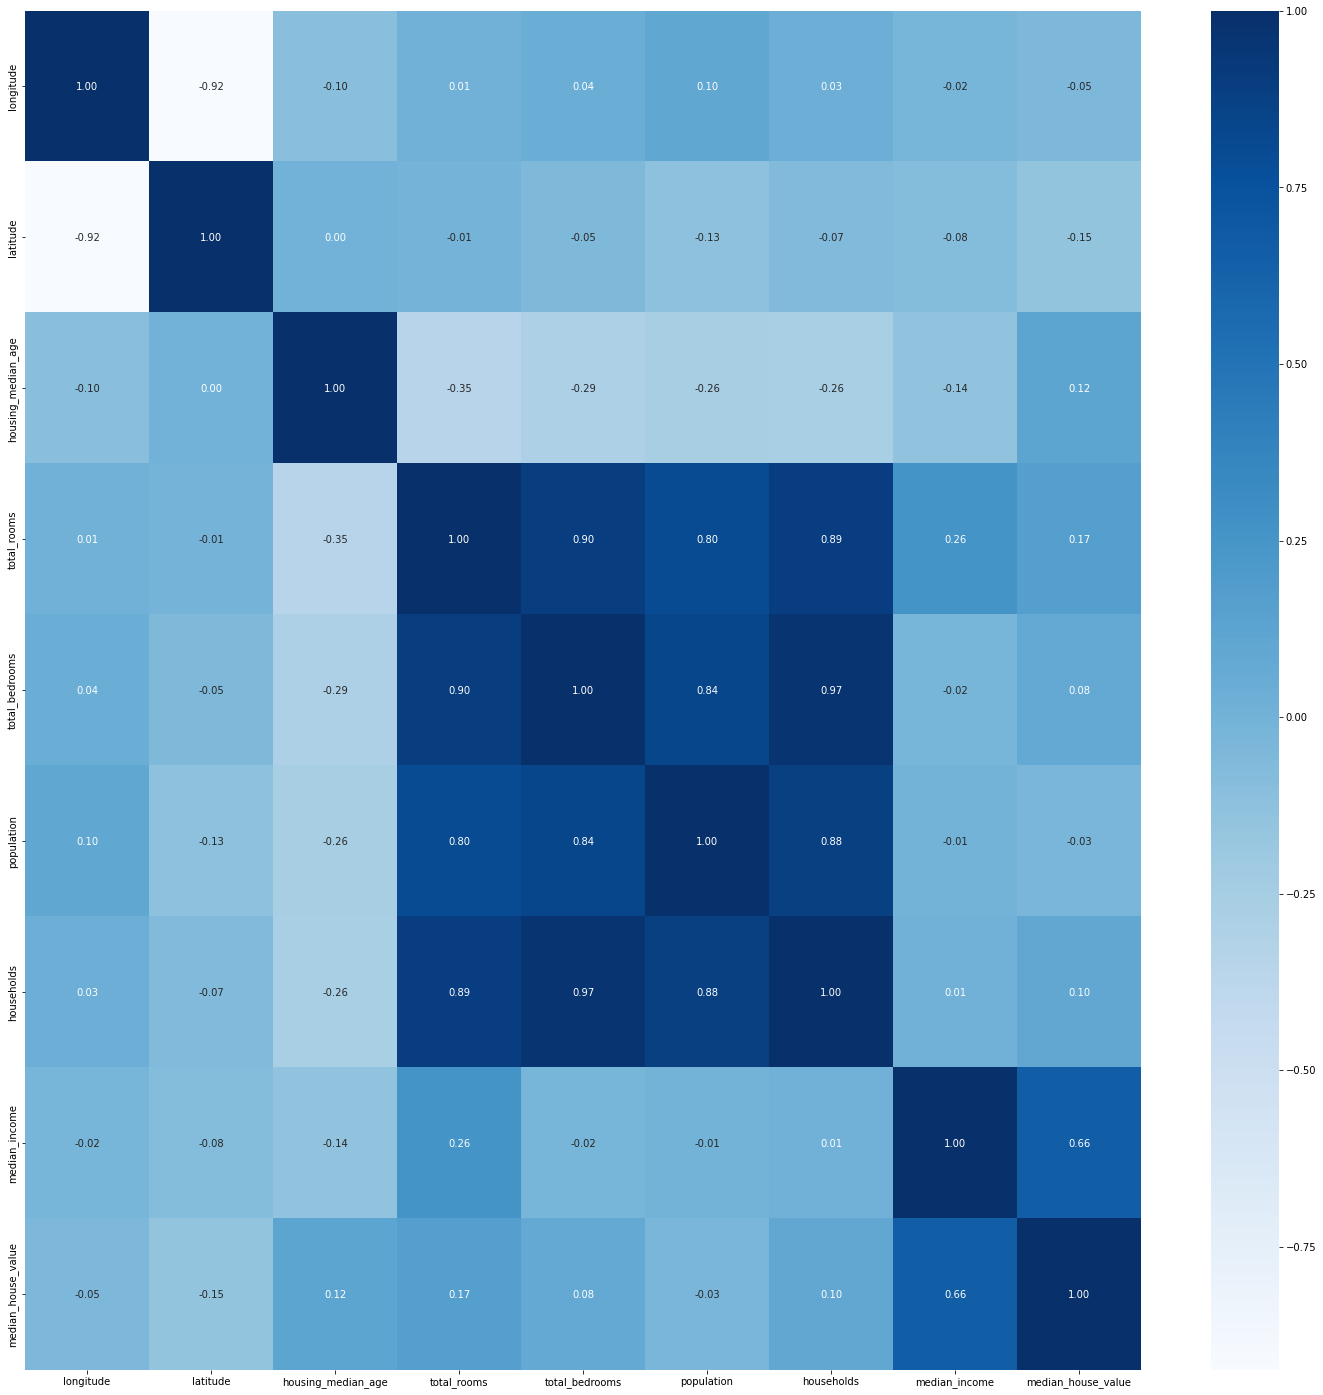

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df2.corr(), cmap="Blues", annot=True, fmt=".2f")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


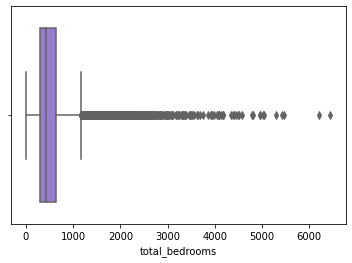

In [ ]:

sns.boxplot(df['total_bedrooms'], color='mediumpurple', orient='v')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

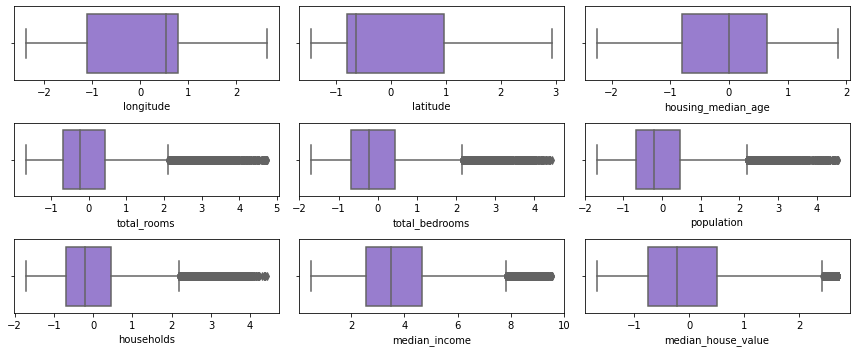

In [ ]:
#melihat sebaran data numerik dengan boxplot
plt.figure(figsize=(12,5))
for i in range(0, len(num)):
  plt.subplot(3, len(num)/3, i+1)
  sns.boxplot( df2[num[i]], color='mediumpurple', orient='v')
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

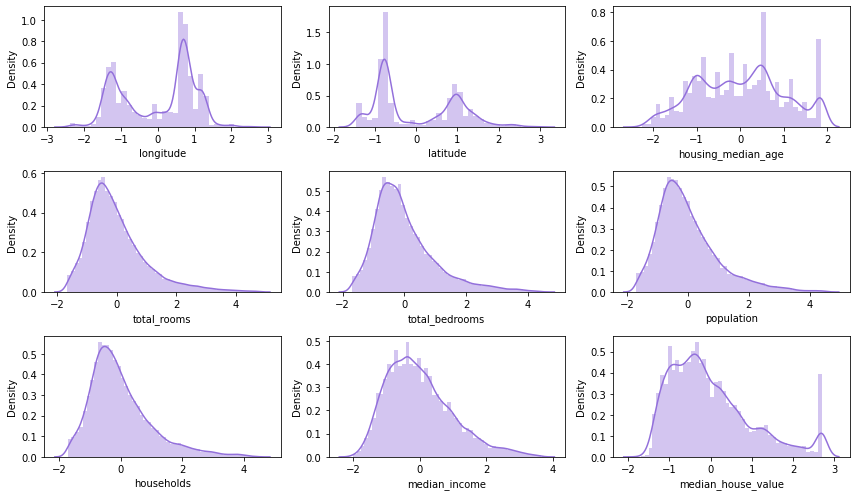

In [ ]:
#melihat sebaran data numerik dengan distplot
plt.figure(figsize=(12,7))
for i in range(0, len(num)):
  plt.subplot(3, len(num)/3, i+1)
  sns.distplot( df2[num[i]], color="mediumpurple")
  plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


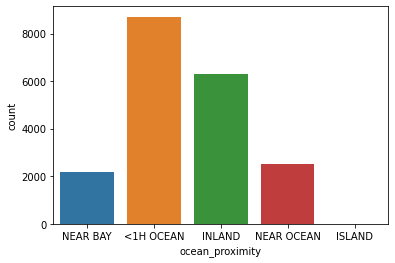

In [ ]:
sns.countplot(df2['ocean_proximity'])

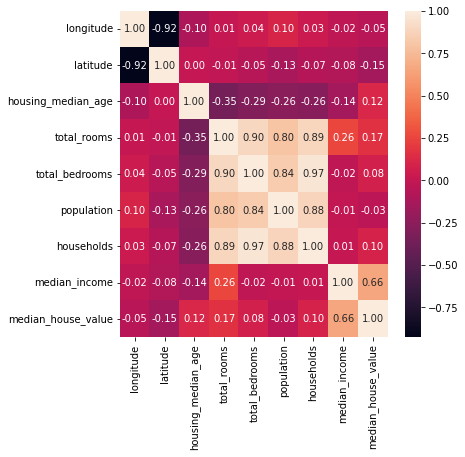

In [ ]:
#membuat heatmap
plt.figure(figsize=(6,6))
sns.heatmap(df2.corr(), annot=True, fmt='.2f')

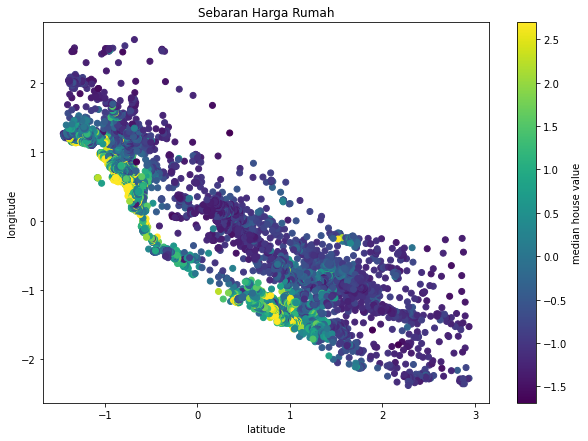

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(df2['latitude'], df2['longitude'], c=df2['median_house_value'])
plt.colorbar().set_label('median house value')
plt.title('Sebaran Harga Rumah')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

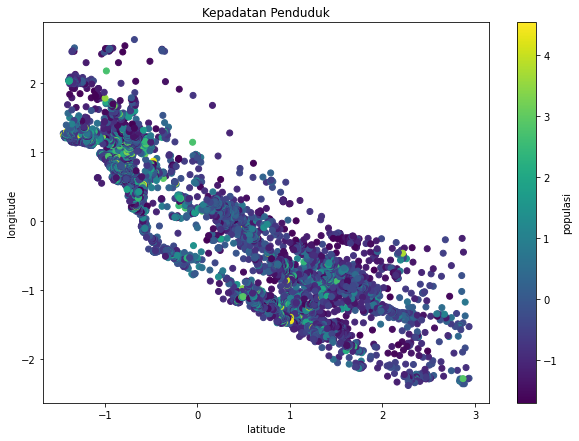

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(df2['latitude'], df2['longitude'], c=df2['population'])
plt.colorbar().set_label('populasi')
plt.title('Kepadatan Penduduk')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

<Figure size 864x864 with 0 Axes>

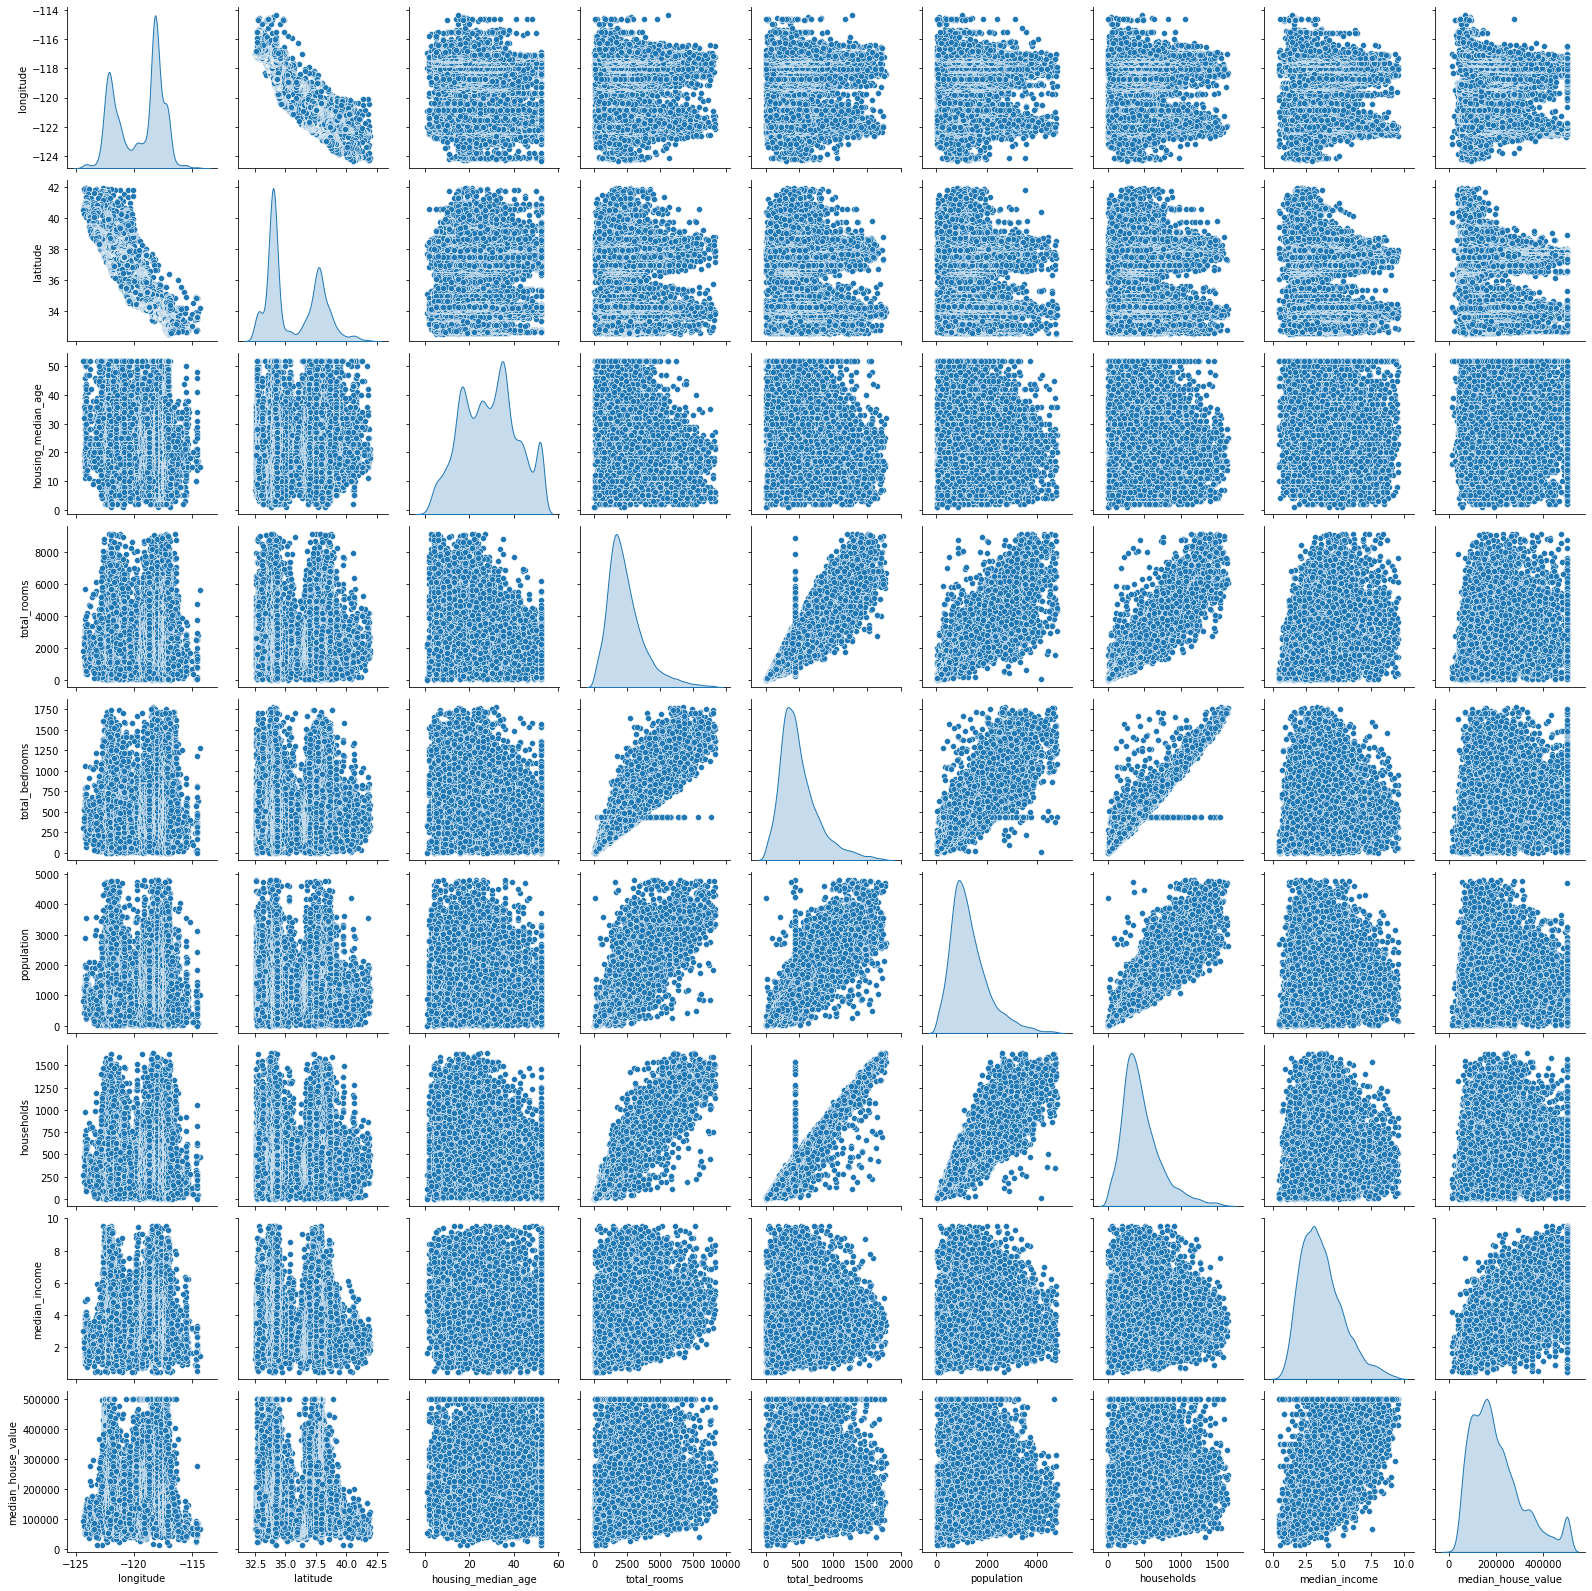

In [ ]:
#membuat pairplot
plt.figure(figsize=(12,12))
sns.pairplot(df2, diag_kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes.

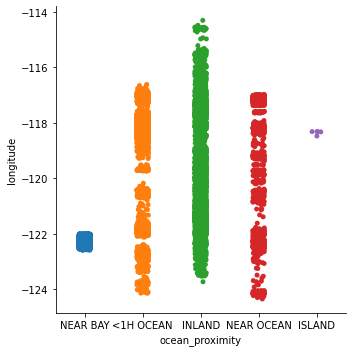

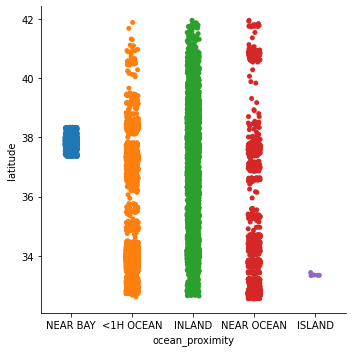

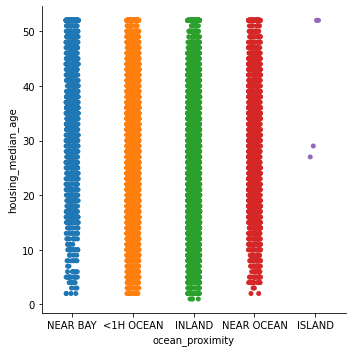

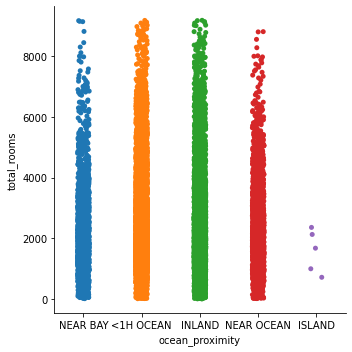

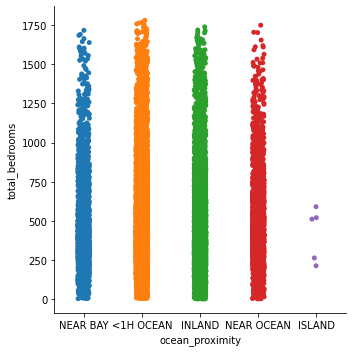

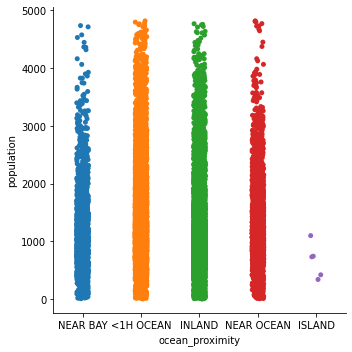

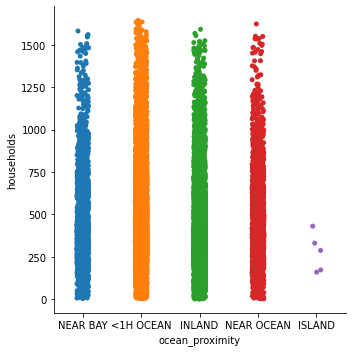

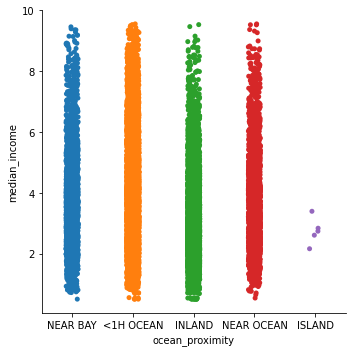

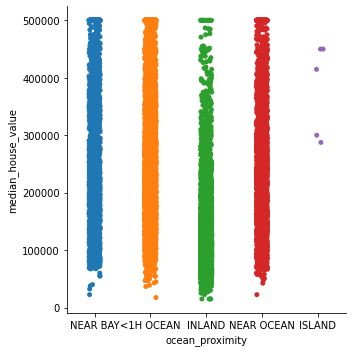

In [ ]:

for i in range (0, len(num)):
  ax= fig.add_subplot(3,3,i+1)
  sns.catplot(ax=ax, data=df2, x='ocean_proximity', y=num[i])
  plt.tight_layout()

# DATA CLEANSING

# Missing Value

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Duplicated Data

# Outliers

# Normalization dan Standarisasi

In [ ]:
df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1.974600e+04,1.974600e+04,1.974600e+04,1.974600e+04,1.974600e+04,1.974600e+04,1.974600e+04,1.974600e+04,1.974600e+04
mean,8.243516e-15,1.433102e-15,1.819414e-15,6.564575e-17,-1.386064e-16,-9.665325e-17,-4.427735e-17,-5.867607e-16,4.434033e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-2.378832e+00,-1.451015e+00,-2.256669e+00,-1.665466e+00,-1.697591e+00,-1.693489e+00,-1.713449e+00,-2.013444e+00,-1.688474e+00
25%,-1.105728e+00,-8.028661e-01,-8.069917e-01,-6.699873e-01,-6.839882e-01,-6.855291e-01,-6.820255e-01,-7.387200e-01,-7.593666e-01
50%,5.368258e-01,-6.443262e-01,-1.615158e-03,-2.154690e-01,-2.147754e-01,-2.080746e-01,-2.111583e-01,-1.459026e-01,-2.243215e-01
75%,7.814615e-01,9.690505e-01,6.426861e-01,4.431294e-01,4.488626e-01,4.660551e-01,4.652461e-01,5.765225e-01,5.104618e-01
max,2.633703e+00,2.936811e+00,1.850751e+00,4.731949e+00,4.451429e+00,4.536711e+00,4.422773e+00,3.640469e+00,2.694937e+00


# EDA

# Feature Encoding

In [ ]:
onehot=pd.get_dummies(df2['ocean_proximity'])
df2=df2.join(onehot)

In [ ]:
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.320408,1.038995,0.964837,-1.053400,-1.258623,-1.280730,-1.250056,2.872000,2.266531,NEAR BAY,0,0,0,1,0
1,-1.315416,1.029669,-0.645916,3.281952,2.118327,1.409319,2.531830,2.857142,1.416062,NEAR BAY,0,0,0,1,0
2,-1.325401,1.025006,1.850751,-0.644194,-1.047779,-1.055589,-1.059467,2.205358,1.358219,NEAR BAY,0,0,0,1,0
3,-1.330393,1.025006,1.850751,-0.778737,-0.892239,-0.975366,-0.902511,1.197528,1.260610,NEAR BAY,0,0,0,1,0
4,-1.330393,1.025006,1.850751,-0.532656,-0.736699,-0.966309,-0.753029,0.075698,1.268744,NEAR BAY,0,0,0,1,0


In [ ]:
df2['log_median_house_value']=np.log10(df2['median_house_value'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df2['log_median_house_value'].shape

(19746,)

# MODELLING

In [ ]:
#split data into data training dan testing
a=df2[['longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income',  
       'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']]
b=df2[['median_house_value']]

x=np.array(a)
y=np.array(b)

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.3, random_state=100)


In [ ]:
#Regresi Linear
regresi_linear= LinearRegression()
regresi_linear.fit(xtrain, ytrain)
regresi_linear_pred= regresi_linear.predict(xtest)
#SVM
svm = SVR()
svm.fit(xtrain, ytrain)
svm_pred=svm.predict(xtest)
#GradientBoostingRegressor
gbr= GradientBoostingRegressor()
gbr.fit(xtrain, ytrain)
gbr_pred = gbr.predict(xtest)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('RMSE regresi linear= ', np.sqrt(mean_squared_error(ytest, regresi_linear_pred)))
print('R2 regresi linear=  ',r2_score(ytest, regresi_linear_pred)) 
print('RMSE svm = ', np.sqrt(mean_squared_error(ytest, svm_pred)))
print('R2 svm =  ',r2_score(ytest, svm_pred)) 
print('RMSE gbr = ', np.sqrt(mean_squared_error(ytest, gbr_pred)))
print('R2 gbr =  ',r2_score(ytest, gbr_pred)) 

RMSE regresi linear=  0.6099766551648048
R2 regresi linear=   0.632773054231608
RMSE svm =  0.5099718544822693
R2 svm =   0.7433149776784317
RMSE gbr =  0.5033562111557223
R2 gbr =   0.7499315073798487


In [ ]:
print("akurasi data train rl:", regresi_linear.score(xtrain, ytrain))
print("akurasi data test rl:", regresi_linear.score(xtest, ytest))
print("akurasi data train svm:", svm.score(xtrain, ytrain))
print("akurasi data test svm:", svm.score(xtest, ytest))
print("akurasi data train gbr:", gbr.score(xtrain, ytrain))
print("akurasi data test gbr:", gbr.score(xtest, ytest))

akurasi data train rl: 0.6364669129826456
akurasi data test rl: 0.632773054231608
akurasi data train svm: 0.757588269119698
akurasi data test svm: 0.7433149776784317
akurasi data train gbr: 0.7707655786793323
akurasi data test gbr: 0.7499315073798487


In [ ]:
summary(gbr_pred)

NameError: ignored

In [ ]:
print(gbr)

GradientBoostingRegressor()


In [ ]:
common_imp_feat = [x for x in gbr_feature_importances.index
if x in rf_feature_importances.index]
commImpFeat_xgb_scores = [xgb_feature_importances[x]
for x in common_imp_feat]
commImpFeat_rf_scores = [rf_feature_importances[x]
for x in common_imp_feat]
ind = np.arange(len(commImpFeat_xgb_scores))
width = 0.35
fig, ax = plt.subplots()
ax.bar(ind - width/2, commImpFeat_xgb_scores, width,
color='#003f5c', label='XGBoost');
ax.bar(ind + width/2, commImpFeat_rf_scores, width,
color='#ffa600', label='Random Forest')
ax.set_xticks(ind);
ax.set_xticklabels(common_imp_feat);
ax.legend();
plt.xticks(rotation=90);


In [ ]:
xgb_feature_importances = gbr.feature_importances_
xgb_feature_importances = pd.Series(xgb_feature_importances, index=xtrain.columns.values).sort_values(ascending=False).head(15)
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances,
y=xgb_feature_importances.index, color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');


AttributeError: ignored

In [ ]:
#Regresi Linear
regresi_linear= LinearRegression()
regresi_linear.fit(xtrain, ytrain)
regresi_linear_pred= regresi_linear.predict(xtest)

#Random Forest Regressor
random_forest = RandomForestRegressor()
random_forest.fit(xtrain,ytrain)
random_forest_pred = random_forest.predict(xtest)

#SVM
svm = SVR()
svm.fit(xtrain, ytrain)
svm_pred=svm.predict(xtest)

#MLPRegressor
mlp= MLPRegressor()
mlp.fit(xtrain,ytrain)
mlp_pred = mlp.predict(xtest)

#GradientBoostingRegressor
gbr= GradientBoostingRegressor()
gbr.fit(xtrain, ytrain)
gbr_pred = gbr.predict(xtest)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colu

In [ ]:
print('RMSE regresi linear= ', np.sqrt(mean_squared_error(ytest, regresi_linear_pred)))
print('R2 regresi linear=  ',r2_score(ytest, regresi_linear_pred)) 
print('RMSE random forest= ', np.sqrt(mean_squared_error(ytest, random_forest_pred)))
print('R2 random forest=  ',r2_score(ytest, random_forest_pred)) 
print('RMSE svm = ', np.sqrt(mean_squared_error(ytest, svm_pred)))
print('R2 svm =  ',r2_score(ytest, svm_pred)) 
print('RMSE mlp = ', np.sqrt(mean_squared_error(ytest, mlp_pred)))
print('R2 mlp =  ',r2_score(ytest, mlp_pred)) 
print('RMSE gbr = ', np.sqrt(mean_squared_error(ytest, gbr_pred)))
print('R2 gbr =  ',r2_score(ytest, gbr_pred)) 

RMSE regresi linear=  0.6099766551648048
R2 regresi linear=   0.632773054231608
RMSE random forest=  0.4465233943979756
R2 random forest=   0.8032129354837327
RMSE svm =  0.5099718544822693
R2 svm =   0.7433149776784317
RMSE mlp =  0.4885714039948958
R2 mlp =   0.7644060136205599
RMSE gbr =  0.5033562111557223
R2 gbr =   0.7499315073798487


In [ ]:
print("akurasi data train:", regresi_linear.score(xtrain, ytrain))
print("akurasi data test:", regresi_linear.score(xtest, ytest))
print("akurasi data train:", random_forest.score(xtrain, ytrain))
print("akurasi data test:", random_forest.score(xtest, ytest))
print("akurasi data train:", svm.score(xtrain, ytrain))
print("akurasi data test:", svm.score(xtest, ytest))
print("akurasi data train:", mlp.score(xtrain, ytrain))
print("akurasi data test:", mlp.score(xtest, ytest))
print("akurasi data train:", gbr.score(xtrain, ytrain))
print("akurasi data test:", gbr.score(xtest, ytest))

akurasi data train: 0.6364669129826456
akurasi data test: 0.632773054231608
akurasi data train: 0.9712909688740754
akurasi data test: 0.8032129354837327
akurasi data train: 0.757588269119698
akurasi data test: 0.7433149776784317
akurasi data train: 0.7877444682692244
akurasi data test: 0.7644060136205599
akurasi data train: 0.7707655786793323
akurasi data test: 0.7499315073798487


In [ ]:

print('Coefficients random forest y train : \n', random_forest_pred[:15])
print('Coefficients random forest y test : \n', ytest[0:15])



Coefficients random forest y train : 
 [ 0.83567349 -0.86875261  0.50051118 -0.62229743 -0.96499747 -0.80153756
  0.29592862 -0.62573185 -0.64224413 -0.75075346 -0.65628907 -0.39991929
  0.5550462   0.41847466 -0.54377594]
Coefficients random forest y test : 
 [[ 2.17886277]
 [-0.91029995]
 [ 0.65235726]
 [-0.86872549]
 [-1.11726843]
 [-0.83167   ]
 [-0.10321326]
 [-0.61927877]
 [-0.87143687]
 [-0.68615941]
 [ 0.20949894]
 [-0.86239895]
 [ 0.21853687]
 [ 1.94929948]
 [-0.67802528]]


In [ ]:
#split data into data training dan testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.2, random_state=100)

#fitting model to train data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

#predict data test
pred = regressor.predict(xtest)

In [ ]:
#metode evaluation
# The coefficients
print('Coefficients: \n', regressor.coef_)

# The Intercept
print('Intercept: \n', regressor.intercept_)

# MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE: %.2f" % mean_squared_error(ytest, pred))

# The RMSE
print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False))

# The MAE
print("MAE: %.2f" % mean_absolute_error(ytest, pred))

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('R2 score: %.2f' % r2_score(ytest, pred))

Coefficients: 
 [[-0.45178652 -0.47217691  0.13273157 -0.17108863  0.35416773 -0.41109055
   0.26973933  0.39770089 -0.00503024 -0.32145442]]
Intercept: 
 [-1.37745724]
MSE: 0.39
RMSE: 0.62
MAE: 0.45
R2 score: 0.63


In [ ]:

#Regresi Linear
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)
#Random Forest Regressor
Rf = RandomForestRegressor()
Rf.fit(xtrain,ytrain)
y_pred_rf = Rf.predict(xtest)
#DecisionTreeRegressor
Dt = DecisionTreeRegressor()
Dt.fit(xtrain,ytrain)
y_pred_dt = Dt.predict(xtest)
#Ridge Regressor
ridge = Ridge()
ridge.fit(xtrain,ytrain)
y_pred_ridge = ridge.predict(xtest)
#SVM
svm = SVR()
svm.fit(xtrain, ytrain)
y_pred_svm=svm.predict(xtest)
#MLPRegressor
mlp= MLPRegressor()
mlp.fit(xtrain,ytrain)
y_pred_mlp = mlp.predict(xtest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print('RMSE LinearRegression: ', np.sqrt(mean_squared_error(ytest, y_pred)))
print('R2 LinearRegression:  ',r2_score(ytest, y_pred)) 
print('RMSE RandomForestRegressor:', np.sqrt(mean_squared_error(ytest, y_pred_rf)))
print('R2 RandomForestRegressor: ',r2_score(ytest, y_pred_rf))
print('RMSE DecisionTreeRegressor: ', np.sqrt(mean_squared_error(ytest, y_pred_dt)))
print('R2 DecisionTreeRegressor: ',r2_score(ytest, y_pred_dt))
print('RMSE RidgeRegressor: ', np.sqrt(mean_squared_error(ytest, y_pred_ridge)))
print('R2 RidgeRegressor: ',r2_score(ytest, y_pred_ridge))
print('RMSE SVM: ', np.sqrt(mean_squared_error(ytest, y_pred_svm)))
print('R2 SVM: ',r2_score(ytest, y_pred_regr))
print('RMSE MLPRegressor: ', np.sqrt(mean_squared_error(ytest, y_pred_mlp)))
print('R2 MLPRegressor: ',r2_score(ytest, y_pred_mlp))

RMSE LinearRegression:  0.6216707940617596
R2 LinearRegression:   0.6321310616542581
RMSE RandomForestRegressor: 0.4513966720004767
R2 RandomForestRegressor:  0.8060503969633537
RMSE DecisionTreeRegressor:  0.6225959544024218
R2 DecisionTreeRegressor:  0.6310353338249326
RMSE RidgeRegressor:  0.6216771636857835
R2 RidgeRegressor:  0.6321235232630266
RMSE SVM:  0.5376972965258265
R2 SVM:  0.7248003386263465
RMSE MLPRegressor:  0.4985091656066954
R2 MLPRegressor:  0.7634524334223904


Missing value=media

Outlier=ZSCORE

X= [['longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income', '<1H OCEAN', 'INLAND']]

Y= [['log_median_house_value']]

Coefficients: 
 [[-6.57296586e-02 -6.47236003e-02  1.44810940e-03 -2.41025258e-05
   2.41836786e-04 -1.14429682e-04  2.44516609e-04  8.94931795e-02
   1.68974388e-02 -1.09912630e-01]]

Intercept: 
 [-0.68489162]

MSE: 0.02

RMSE: 0.14

MAE: 0.10

R2 score: 0.68



Missing value=media

Outlier=ZSCORE
X= [['longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income', '<1H OCEAN', 'INLAND']]

Y= [['median_house_value']]

Coefficients: 
 [[-2.62627061e+04 -2.56865038e+04  1.15149807e+03 -1.30374990e+01
   1.29067242e+02 -5.99327943e+01  1.18753814e+02  4.34126182e+04
   7.36667441e+02 -3.42664870e+04]]

Intercept: 
 [-2216127.23303469]

MSE: 4480839865.63

RMSE: 66939.08

MAE: 48761.62

R2 score: 0.64
